# Time-Series Forecasting of Carbon Monoxide and Nitrogen Dioxide Levels

Build predictive models to forecast daily or hourly concentrations of **CO(GT)** and **NO₂(GT)** based on historical data.


In [7]:
import pandas as pd

In [9]:
url = 'https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/refs/heads/main/airquality.csv'
df = pd.read_csv(url)
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,2004-03-10,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,2004-03-10,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,2004-03-10,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,2004-03-10,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [10]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [11]:
df.shape

(9357, 15)

# Project Workflow

### **Deliverables**:
1. **Forecasting Models**:
   - Trained models for `CO(GT)` and `NO₂(GT)`.
2. **Forecast Visualization**:
   - Plots showing historical trends and future predictions.
3. **Evaluation Report**:
   - Metrics and comparison of different forecasting models.
4. **Insights and Recommendations**:
   - Suggestions for mitigating high levels of these gases based on predictions.


### 1. Data Preprocessing
- **Date-Time Parsing**:
  - Combine the `Date` and `Time` columns into a single `datetime` column.
  - Set the `datetime` column as the index of the dataset.
- **Resampling**:
  - Aggregate the data into meaningful time intervals (e.g., hourly or daily averages).
- **Handle Missing Values**:
  - Use interpolation, mean, or advanced imputation techniques to fill missing data for `CO(GT)` and `NO₂(GT)`.
- **Outlier Detection**:
  - Remove or cap extreme values in `CO(GT)` and `NO₂(GT)` using statistical thresholds.

In [14]:
df['datetime'] = pd.DatetimeIndex(df['Date']+ ' '+ df['Time'])    # datetime index column

In [15]:
# df= df.drop(['Datetime'],axis=1)

In [16]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,datetime
0,2004-03-10,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578,2004-03-10 18:00:00
1,2004-03-10,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255,2004-03-10 19:00:00
2,2004-03-10,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502,2004-03-10 20:00:00
3,2004-03-10,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867,2004-03-10 21:00:00
4,2004-03-10,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888,2004-03-10 22:00:00


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   object        
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   int64         
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   int64         
 7   NOx(GT)        9357 non-null   int64         
 8   PT08.S3(NOx)   9357 non-null   int64         
 9   NO2(GT)        9357 non-null   int64         
 10  PT08.S4(NO2)   9357 non-null   int64         
 11  PT08.S5(O3)    9357 non-null   int64         
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
 15  datetime       9357 n

In [18]:
df = df.set_index('datetime').sort_index()

In [19]:
print(type(df.index))  

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [20]:
df_numeric = df.select_dtypes(include='number')
df_daily = df_numeric.resample('D').mean()
print(df_daily.head())

               CO(GT)  PT08.S1(CO)    NMHC(GT)   C6H6(GT)  PT08.S2(NMHC)  \
datetime                                                                   
2004-03-10   1.966667  1316.500000   86.500000   8.450000     912.333333   
2004-03-11  -6.187500  1244.166667  104.500000   7.979167     851.958333   
2004-03-12 -14.095833  1281.666667  141.500000  12.129167    1008.291667   
2004-03-13  -5.750000  1330.666667  139.250000  10.916667     992.833333   
2004-03-14  -5.966667  1361.125000  116.958333   9.637500     943.916667   

               NOx(GT)  PT08.S3(NOx)     NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
datetime                                                                      
2004-03-10  132.000000   1167.333333  108.833333   1545.500000  1096.000000   
2004-03-11  130.041667   1277.250000   87.375000   1522.833333   885.250000   
2004-03-12  142.583333   1101.875000   89.916667   1627.291667  1084.375000   
2004-03-13  168.416667    993.208333  105.583333   1595.791667  1245.916

In [21]:
df_daily.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
datetime,,,,,,,,,,,,,
2004-03-10,1.966667,1316.500000,86.500000,8.450000,912.333333,132.000000,1167.333333,108.833333,1545.500000,1096.000000,12.033333,54.900000,0.765633
2004-03-11,-6.187500,1244.166667,104.500000,7.979167,851.958333,130.041667,1277.250000,87.375000,1522.833333,885.250000,9.837500,64.075000,0.775767
2004-03-12,-14.095833,1281.666667,141.500000,12.129167,1008.291667,142.583333,1101.875000,89.916667,1627.291667,1084.375000,11.287500,51.095833,0.663104
2004-03-13,-5.750000,1330.666667,139.250000,10.916667,992.833333,168.416667,993.208333,105.583333,1595.791667,1245.916667,12.866667,51.533333,0.732296
2004-03-14,-5.966667,1361.125000,116.958333,9.637500,943.916667,132.166667,1001.291667,97.458333,1602.375000,1234.208333,16.012500,48.850000,0.849671


In [22]:
df_daily.shape    #(391, 13) shape is expected. The drop from 9000 → 391 rows comes from aggregating many measurements per day into one daily average and the drop from 15 → 13 columns comes from keeping only numeric data.

(391, 13)

In [23]:
df_daily.isnull().sum()

CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [24]:
df_daily.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
datetime,,,,,,,,,,,,,
2004-03-10,1.966667,1316.500000,86.500000,8.450000,912.333333,132.000000,1167.333333,108.833333,1545.500000,1096.000000,12.033333,54.900000,0.765633
2004-03-11,-6.187500,1244.166667,104.500000,7.979167,851.958333,130.041667,1277.250000,87.375000,1522.833333,885.250000,9.837500,64.075000,0.775767
2004-03-12,-14.095833,1281.666667,141.500000,12.129167,1008.291667,142.583333,1101.875000,89.916667,1627.291667,1084.375000,11.287500,51.095833,0.663104
2004-03-13,-5.750000,1330.666667,139.250000,10.916667,992.833333,168.416667,993.208333,105.583333,1595.791667,1245.916667,12.866667,51.533333,0.732296
2004-03-14,-5.966667,1361.125000,116.958333,9.637500,943.916667,132.166667,1001.291667,97.458333,1602.375000,1234.208333,16.012500,48.850000,0.849671


In [47]:
import numpy as np

df_daily[df_daily.select_dtypes(include=['number']).columns] = (
    df_daily.select_dtypes(include=['number']).mask(df_daily.select_dtypes(include=['number']) < 0, np.nan)
)

In [53]:
df_daily = df_daily.interpolate(method='linear')   # smooth interpolation
df_daily = df_daily.bfill().ffill()                # fill edges if needed

In [63]:
df_daily.isnull().sum()

CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

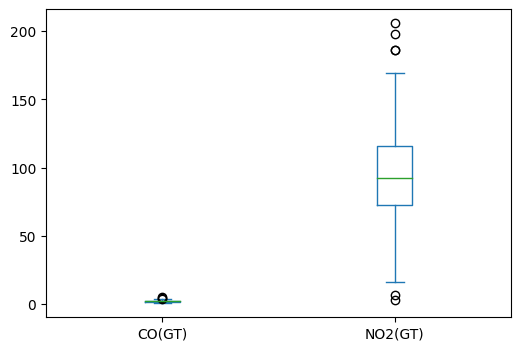

In [65]:
import matplotlib.pyplot as plt

# Boxplot
df_daily[['CO(GT)', 'NO2(GT)']].plot(kind='box', figsize=(6,4))
plt.show()

In [67]:
df_daily[['CO(GT)', 'NO2(GT)']].describe()

,CO(GT),NO2(GT)
count,391.000000,391.000000
mean,2.154689,95.217391
std,0.690274,33.477066
min,0.612500,3.000000
25%,1.691667,72.895833
50%,2.087500,92.583333
75%,2.626750,115.526042
max,5.320833,205.708333


In [69]:
# Tukey’s method for outlier detection
def outliers(df_daily):
    Q1 = df_daily.quantile(0.25)
    Q3 = df_daily.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df_daily.clip(lower, upper)

In [71]:
df_daily['CO(GT)'] = outliers(df_daily['CO(GT)'])
df_daily['NO2(GT)'] = outliers(df_daily['NO2(GT)'])

In [73]:
df_daily.shape

(391, 13)

### 2. Exploratory Data Analysis (EDA)
- **Trend Analysis**:
  - Visualize the long-term trends of `CO(GT)` and `NO₂(GT)`.
- **Seasonality**:
  - Identify seasonal patterns (e.g., daily or yearly fluctuations).
- **Correlation Analysis**:
  - Explore relationships between `CO(GT)`, `NO₂(GT)`, and other features (e.g., temperature or humidity).


In [76]:
df_daily.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
datetime,,,,,,,,,,,,,
2004-03-10,1.966667,1316.500000,86.500000,8.450000,912.333333,132.000000,1167.333333,108.833333,1545.500000,1096.000000,12.033333,54.900000,0.765633
2004-03-11,1.962500,1244.166667,104.500000,7.979167,851.958333,130.041667,1277.250000,87.375000,1522.833333,885.250000,9.837500,64.075000,0.775767
2004-03-12,1.958333,1281.666667,141.500000,12.129167,1008.291667,142.583333,1101.875000,89.916667,1627.291667,1084.375000,11.287500,51.095833,0.663104
2004-03-13,1.954167,1330.666667,139.250000,10.916667,992.833333,168.416667,993.208333,105.583333,1595.791667,1245.916667,12.866667,51.533333,0.732296
2004-03-14,1.950000,1361.125000,116.958333,9.637500,943.916667,132.166667,1001.291667,97.458333,1602.375000,1234.208333,16.012500,48.850000,0.849671


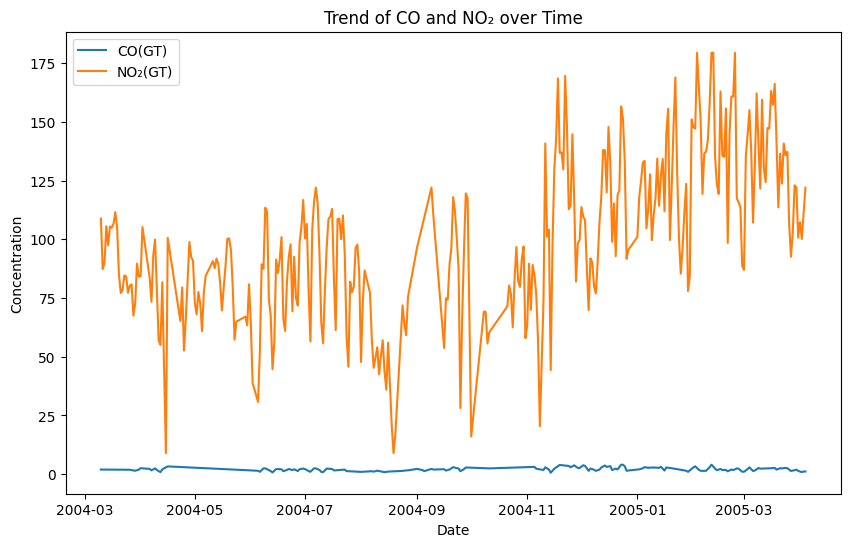

In [78]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(df_daily.index, df_daily['CO(GT)'], label='CO(GT)')
plt.plot(df_daily.index, df_daily['NO2(GT)'], label='NO₂(GT)')
plt.title("Trend of CO and NO₂ over Time")
plt.xlabel("Date")
plt.ylabel("Concentration")
plt.legend()
plt.show()

In [82]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_daily['NO2(GT)'])
print('ADF Statistics:', result[0])
print('p-value:', result[1])

ADF Statistics: -2.8061534914849133
p-value: 0.05740014750068582


In [84]:
import seaborn as sns

<Figure size 1000x600 with 0 Axes>

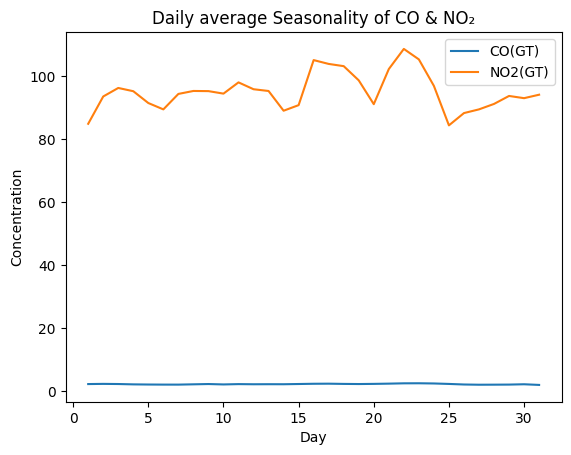

In [86]:
df_daily['day'] = df_daily.index.day

monthly_avg = df_daily.groupby('day')[['CO(GT)', 'NO2(GT)']].mean()
plt.figure(figsize=(10,6))
monthly_avg.plot()
plt.title("Daily average Seasonality of CO & NO₂")
plt.xlabel("Day")
plt.ylabel("Concentration")
plt.show()

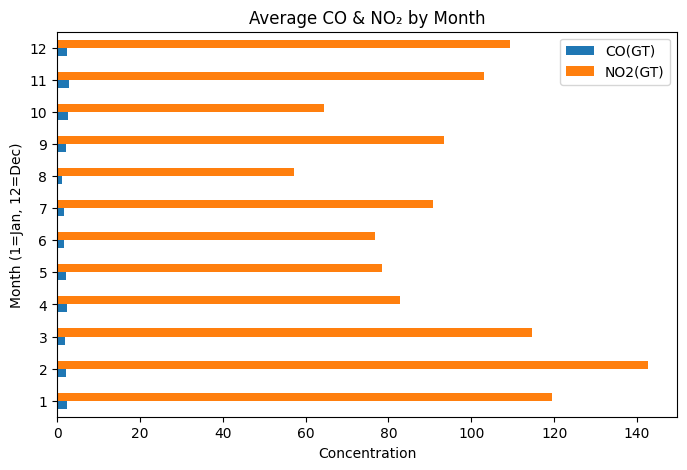

In [88]:
# Extract month
df_daily['month'] = df_daily.index.month
# Average per month
monthly_avg = df_daily.groupby('month')[['CO(GT)', 'NO2(GT)']].mean() 
monthly_avg.plot(kind='barh', figsize=(8,5)) 

plt.title("Average CO & NO₂ by Month")
plt.ylabel("Month (1=Jan, 12=Dec)")
plt.xlabel("Concentration")
plt.show() 

### Analysis result:
- **Monthly average analysis**: In year ending months including Jan, Feb, Mar, Nov,Dec have over 90 concentration of NO2(GT). This Bar chart there months also indicates comparatively higher concentration of CO(GT). But middle of the year when NO2(GT) concentration is slight lower there CO(GT) also have lower concentration.
- **Correlation**: NO2(GT) and CO(GT) are positively correlated which is 0.38 . Now, temparature(T), Humidity(AH,RH) are highly correlated features. Temparature has negatively lower correlation with NO2(GT) and CO(GT).

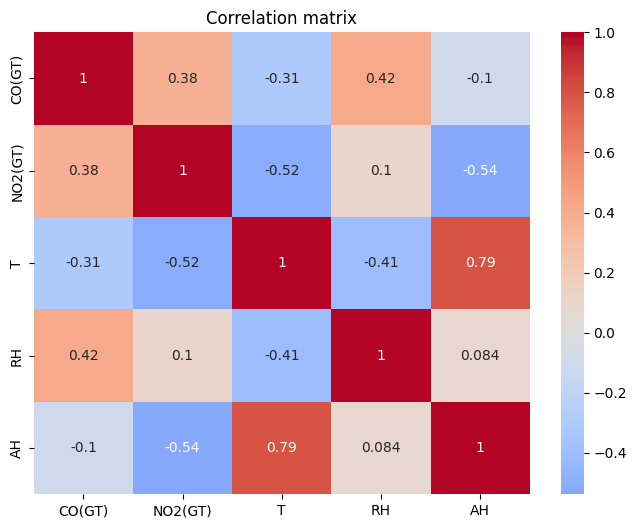

In [93]:
corr = df_daily[['CO(GT)', 'NO2(GT)', 'T', 'RH', 'AH']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation matrix")
plt.show()


### 3. Feature Engineering
- Create lag features for `CO(GT)` and `NO₂(GT)` to incorporate historical values.
- Add time-based features (e.g., hour of the day, day of the week, month).
- Include environmental factors (`T`, `RH`, `AH`) as predictors.


In [96]:
# Create lag-1 features to see previous vlaues of CO(GT) and NO2(GT)
df_daily['CO_lag1'] = df_daily['CO(GT)'].shift(1)
df_daily['NO2_lag1'] = df_daily['NO2(GT)'].shift(1)

In [98]:
df_daily=df_daily.dropna()

In [100]:
df_daily['day_of_week'] = df_daily.index.dayofweek  # 0=Monday, 6=Sunday
df_daily['week_of_year'] = df_daily.index.isocalendar().week
df_daily['month'] = df_daily.index.month
df_daily['day_of_month'] = df_daily.index.day

In [102]:
df_daily['PT08.S2(NMHC)'].unique()	

array([ 851.95833333, 1008.29166667,  992.83333333,  943.91666667,
       1138.91666667, 1061.91666667, 1099.08333333, 1072.58333333,
       1058.        ,  911.95833333,  870.625     ,  911.54166667,
        896.625     ,  888.875     ,  859.70833333,  892.5       ,
        873.125     ,  783.45833333,  762.20833333,  912.91666667,
        863.29166667,  859.125     , 1059.29166667,  989.70833333,
        856.79166667,  970.54166667,  969.875     ,  823.16666667,
        962.91666667,  916.33333333,  869.75      ,  707.95833333,
        599.75      ,  912.83333333,  959.45833333, 1085.25      ,
       1069.        ,  828.625     ,  800.625     ,  872.5       ,
       1034.58333333, 1078.33333333, 1072.29166667, 1163.16666667,
        976.33333333,  695.125     ,  778.58333333,  985.41666667,
       1111.04166667, 1141.29166667, 1103.58333333,  913.70833333,
        858.91666667,  995.5       ,  971.70833333,  942.91666667,
        897.33333333,  936.875     ,  839.5       ,  837.25   

In [107]:
df_daily.tail()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,day,month,CO_lag1,NO2_lag1,day_of_week,week_of_year,day_of_month
datetime,,,,,,,,,,,,,,,,,,,,
2005-03-31,1.387500,1008.125000,261.416667,5.220833,749.416667,185.083333,795.666667,100.708333,1176.541667,763.833333,17.550000,50.083333,0.951917,31,3,1.916667,122.125000,3,13,31
2005-04-01,1.120833,903.291667,261.416667,3.412500,663.000000,161.833333,946.875000,107.333333,943.250000,523.958333,15.929167,35.962500,0.636529,1,4,1.387500,100.708333,4,13,1
2005-04-02,0.854167,890.958333,261.416667,2.529167,616.291667,142.375000,991.750000,100.166667,864.333333,481.750000,15.483333,32.225000,0.546167,2,4,1.120833,107.333333,5,13,2
2005-04-03,1.141667,981.375000,261.416667,4.316667,714.708333,167.666667,856.166667,111.125000,985.166667,717.083333,18.383333,33.695833,0.617583,3,4,0.854167,100.166667,6,13,3
2005-04-04,1.141667,1090.533333,261.416667,8.440000,862.266667,263.333333,745.266667,122.000000,1195.066667,995.266667,16.960000,42.786667,0.724787,4,4,1.141667,111.125000,0,14,4


In [109]:
df_daily = df_daily.drop(['day_of_month'],axis=1)

In [111]:
df_daily.shape

(390, 19)

In [113]:
#including environmental lags as predictors
for col in ['T', 'RH', 'AH']:
    df_daily[f'{col}_lag1'] = df_daily[col].shift(1)

In [115]:
df_daily=df_daily.dropna()

In [117]:
df_daily.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),...,AH,day,month,CO_lag1,NO2_lag1,day_of_week,week_of_year,T_lag1,RH_lag1,AH_lag1
datetime,,,,,,,,,,,,,,,,,,,,,
2004-03-12,1.958333,1281.666667,141.500000,12.129167,1008.291667,142.583333,1101.875000,89.916667,1627.291667,1084.375000,...,0.663104,12,3,1.962500,87.375000,4,11,9.837500,64.075000,0.775767
2004-03-13,1.954167,1330.666667,139.250000,10.916667,992.833333,168.416667,993.208333,105.583333,1595.791667,1245.916667,...,0.732296,13,3,1.958333,89.916667,5,11,11.287500,51.095833,0.663104
2004-03-14,1.950000,1361.125000,116.958333,9.637500,943.916667,132.166667,1001.291667,97.458333,1602.375000,1234.208333,...,0.849671,14,3,1.954167,105.583333,6,11,12.866667,51.533333,0.732296
2004-03-15,1.945833,1452.166667,236.625000,16.091667,1138.916667,197.833333,845.625000,105.458333,1888.625000,1439.083333,...,0.944029,15,3,1.950000,97.458333,0,12,16.012500,48.850000,0.849671
2004-03-16,1.941667,1339.666667,191.125000,13.500000,1061.916667,165.708333,939.291667,104.916667,1726.625000,1322.625000,...,0.871021,16,3,1.945833,105.458333,1,12,17.366667,50.320833,0.944029


### 4. Time-Series Forecasting
- Train separate models for **CO(GT)** and **NO₂(GT)**.
- Explore the following forecasting approaches:
  - **Statistical Models**:
    - Classical models like ARIMA or SARIMA for univariate forecasting.
  - **Machine Learning Models**:
    - Use regression models trained on lag features and external predictors.
  - **Deep Learning Models**:
    - Apply LSTM, GRU, or other RNN-based models for sequence forecasting.
- Evaluate and compare the models.


# ARIMA model 

### *Predict CO(GT)*

In [122]:
# applying differencing to find seasonality
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_daily['CO(GT)'])
print('ADF value:', result[0])
print('p-value:', result[1])

if result[1] >0.05:
    print('The time series is not stationary. Differencing will be applied')
    df_daily['CO(GT)_diff'] = df_daily['CO(GT)'].diff().dropna()

else:
    print('The series is stationary. Proceeding without differencing')

ADF value: -3.674020009038291
p-value: 0.004493786397780226
The series is stationary. Proceeding without differencing


In [124]:
# tunning the arima model
import pmdarima as pm

In [125]:
model = pm.auto_arima(df_daily['CO(GT)'],
                      seasonal=False,   
                      trace=True) 

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=313.101, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=378.687, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=369.323, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=363.167, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=376.698, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=309.511, Time=0.23 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=350.610, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=362.357, Time=0.06 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=308.171, Time=0.38 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=317.029, Time=0.15 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=305.798, Time=0.44 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=307.600, Time=0.52 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=306.369, Time=0.37 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=306.631, Time=0.40 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=305.8

In [126]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  389
Model:               SARIMAX(2, 1, 1)   Log Likelihood                -145.944
Date:                Sat, 13 Sep 2025   AIC                            299.887
Time:                        20:56:29   BIC                            315.731
Sample:                    03-12-2004   HQIC                           306.169
                         - 04-04-2005                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9414      0.041     22.947      0.000       0.861       1.022
ar.L2         -0.3695      0.037     -9.938      0.000      -0.442      -0.297
ma.L1         -0.8792      0.039    -22.776      0.0

In [128]:
from statsmodels.tsa.arima.model import ARIMA

In [129]:
df_daily = df_daily.asfreq('D')
print(df_daily.index.freq)

<Day>


In [134]:
# ARIMA model for CO(GT)
p, d, q = 2,1,1

arima_CO = ARIMA(df_daily['CO(GT)'], order= (p, d, q))
arima_fit_CO= arima_CO.fit()

In [136]:
print(arima_fit_CO.summary())

                               SARIMAX Results                                
Dep. Variable:                 CO(GT)   No. Observations:                  389
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -145.944
Date:                Sat, 13 Sep 2025   AIC                            299.887
Time:                        20:56:47   BIC                            315.731
Sample:                    03-12-2004   HQIC                           306.169
                         - 04-04-2005                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9414      0.041     22.947      0.000       0.861       1.022
ar.L2         -0.3695      0.037     -9.938      0.000      -0.442      -0.297
ma.L1         -0.8792      0.039    -22.776      0.0

In [138]:
#forecast future values of CO(GT)
forecast_steps = 100
forecast_CO = arima_fit_CO.forecast(steps=forecast_steps)
print('ARIMA Forecast of CO(GT):\n', forecast_CO)

ARIMA Forecast of CO(GT):
 2005-04-05    1.335103
2005-04-06    1.517195
2005-04-07    1.617126
2005-04-08    1.643906
2005-04-09    1.632186
                ...   
2005-07-09    1.593423
2005-07-10    1.593423
2005-07-11    1.593423
2005-07-12    1.593423
2005-07-13    1.593423
Freq: D, Name: predicted_mean, Length: 100, dtype: float64


In [140]:
df_daily_CO = pd.DataFrame({
    'Date': pd.to_datetime([str(i) for i in forecast_CO.index]),
    'predicted_CO(GT)': forecast_CO.values
})

In [142]:
df_daily_CO.head()

,Date,predicted_CO(GT)
0,2005-04-05,1.335103
1,2005-04-06,1.517195
2,2005-04-07,1.617126
3,2005-04-08,1.643906
4,2005-04-09,1.632186


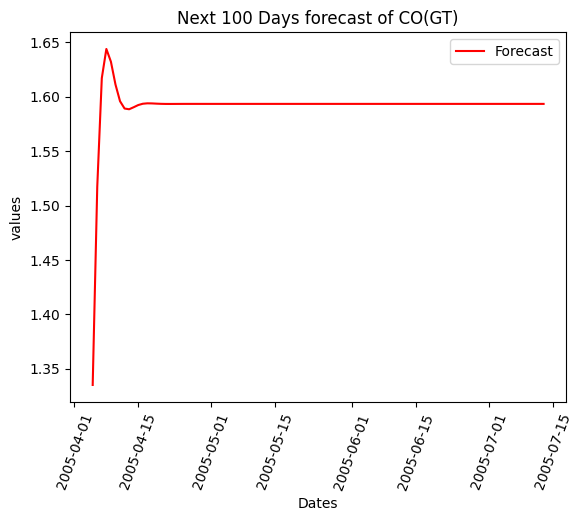

In [144]:
#plt.plot(df['CO(GT)'], label='Historical')
plt.plot(df_daily_CO['Date'], df_daily_CO['predicted_CO(GT)'], color='red', label='Forecast')
plt.legend()
plt.xlabel('Dates')
plt.ylabel('values')
plt.title('Next 100 Days forecast of CO(GT)')
plt.xticks(rotation=70)
plt.show()

### *predict NO2(GT)*

In [176]:
# applying differencing to find seasonality
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_daily['NO2(GT)'])
print('ADF value:', result[0])
print('p-value:', result[1])

if result[1] >0.05:
    print('The time series is not stationary. Differencing will be applied')
    df_daily['NO2(GT)_diff'] = df_daily['NO2(GT)'].diff().dropna()

else:
    print('The series is stationary. Proceeding without differencing')

ADF value: -2.805425093195391
p-value: 0.057503001060161436
The time series is not stationary. Differencing will be applied


In [178]:
df_daily = df_daily.drop(df_daily.index[0])

In [202]:
df_daily = df_daily.drop(['NO2(GT)_diff'], axis=1)

In [206]:
df_daily.columns

Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH', 'day', 'month', 'CO_lag1', 'NO2_lag1', 'day_of_week',
       'week_of_year', 'T_lag1', 'RH_lag1', 'AH_lag1'],
      dtype='object')

In [210]:
df_daily = df_daily.asfreq('D')
print(df_daily.index.freq)

<Day>


In [212]:
model_no2 = pm.auto_arima(df_daily['NO2(GT)'],
                      seasonal=False,   
                      trace=True) 

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3368.419, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3426.641, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3426.615, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3424.696, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3424.642, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3368.706, Time=0.15 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3369.223, Time=0.17 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3369.688, Time=0.23 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=3369.816, Time=0.28 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3373.944, Time=0.14 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3370.474, Time=0.25 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3370.909, Time=0.25 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=3371.591, Time=0.36 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=3366.881, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0]          

In [214]:
print(model_no2.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  388
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -1678.441
Date:                Sat, 13 Sep 2025   AIC                           3366.881
Time:                        21:43:32   BIC                           3386.674
Sample:                    03-13-2004   HQIC                          3374.729
                         - 04-04-2005                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0685      0.133     -0.516      0.606      -0.329       0.192
ar.L2          0.3852      0.120      3.215      0.001       0.150       0.620
ma.L1         -0.1540      0.112     -1.380      0.1

In [216]:
train_no2 = df_daily['NO2(GT)'][:-30]
test_no2 = df_daily['NO2(GT)'][-30:]

In [218]:
# ARIMA model for CO(GT)
p, d, q = 2,1,2

arima_no2 = ARIMA(train_no2, order= (p, d, q))
arima_fit_NO= arima_no2.fit()

C:\Users\PC\anaconda3\envs\py312-env\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [220]:
print(arima_fit_NO.summary())

                               SARIMAX Results                                
Dep. Variable:                NO2(GT)   No. Observations:                  358
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1550.615
Date:                Sat, 13 Sep 2025   AIC                           3111.229
Time:                        21:43:47   BIC                           3130.618
Sample:                    03-13-2004   HQIC                          3118.941
                         - 03-05-2005                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0299      0.155     -0.193      0.847      -0.334       0.274
ar.L2          0.3734      0.136      2.739      0.006       0.106       0.641
ma.L1         -0.1861      0.133     -1.394      0.1

### forecast future values of CO(GT)

In [222]:
#forecast future values of CO(GT)
forecast_steps = len(test_no2)
forecast_NO = arima_fit_NO.forecast(steps=forecast_steps)
print('ARIMA Forecast of CO(GT):\n', forecast_NO)

ARIMA Forecast of CO(GT):
 2005-03-06    131.869701
2005-03-07    135.089265
2005-03-08    132.937362
2005-03-09    134.203868
2005-03-10    133.362496
2005-03-11    133.860558
2005-03-12    133.531503
2005-03-13    133.727315
2005-03-14    133.598594
2005-03-15    133.675558
2005-03-16    133.625193
2005-03-17    133.655436
2005-03-18    133.635726
2005-03-19    133.647608
2005-03-20    133.639893
2005-03-21    133.644561
2005-03-22    133.641541
2005-03-23    133.643374
2005-03-24    133.642191
2005-03-25    133.642911
2005-03-26    133.642448
2005-03-27    133.642730
2005-03-28    133.642549
2005-03-29    133.642660
2005-03-30    133.642589
2005-03-31    133.642633
2005-04-01    133.642605
2005-04-02    133.642622
2005-04-03    133.642611
2005-04-04    133.642618
Freq: D, Name: predicted_mean, dtype: float64


In [224]:
df_daily_NO = pd.DataFrame({
    'Date': pd.to_datetime([str(i) for i in forecast_NO.index]),
    'predicted_NO2(GT)': forecast_NO.values
})

In [228]:
df_daily_NO.tail()

,Date,predicted_NO2(GT)
25,2005-03-31,133.642633
26,2005-04-01,133.642605
27,2005-04-02,133.642622
28,2005-04-03,133.642611
29,2005-04-04,133.642618


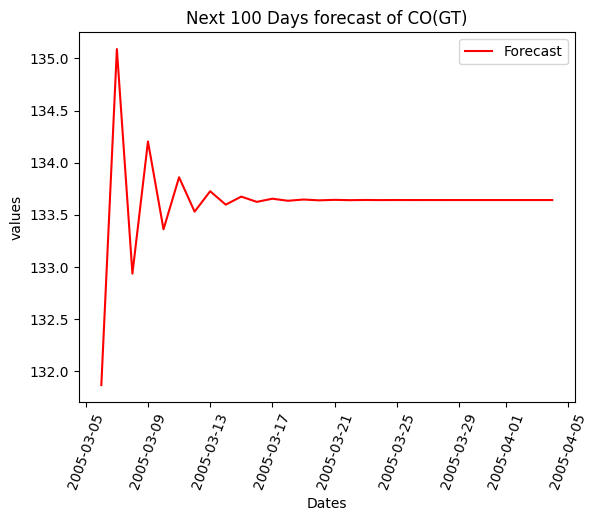

In [230]:
#plt.plot(df['CO(GT)'], label='Historical')
plt.plot(df_daily_NO['Date'], df_daily_NO['predicted_NO2(GT)'], color='red', label='Forecast')
plt.legend()
plt.xlabel('Dates')
plt.ylabel('values')
plt.title('Next 100 Days forecast of CO(GT)')
plt.xticks(rotation=70)
plt.show()

# *Random Forest Regressor*

In [233]:
df_daily.columns

Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH', 'day', 'month', 'CO_lag1', 'NO2_lag1', 'day_of_week',
       'week_of_year', 'T_lag1', 'RH_lag1', 'AH_lag1'],
      dtype='object')

### **NO2(GT)**

In [75]:
x = df_daily.drop(['NO2(GT)'],axis=1)
y = df_daily['NO2(GT)']

In [76]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=False,random_state=30)

In [78]:
# Train model
rf_model = RandomForestRegressor(n_estimators=200,random_state=30)
rf_model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=30)

In [79]:
# Predict
y_pred = rf_model.predict(x_test)

In [80]:
rf_model.score(x_train,y_train)

0.9891023684418143

In [81]:
rf_model.score(x_test,y_test)

0.6723157736595049

In [82]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")

MAE: 16.55, RMSE: 21.28


### **CO(GT)**

In [84]:
df_daily.columns

Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH', 'day', 'month', 'CO_lag1', 'NO2_lag1', 'day_of_week',
       'week_of_year', 'T_lag1', 'RH_lag1', 'AH_lag1'],
      dtype='object')

In [85]:
x_co = df_daily.drop(['CO(GT)'],axis=1)
y_co = df_daily['CO(GT)']

In [86]:
xtrain, xtest, ytrain, ytest = train_test_split(x_co, y_co, test_size=0.3, shuffle=False,random_state=30)

In [87]:
# Train model
rf_model_co = RandomForestRegressor(n_estimators=200,random_state=30)
rf_model_co.fit(xtrain, ytrain)

RandomForestRegressor(n_estimators=200, random_state=30)

In [88]:
# Predict
ypred = rf_model_co.predict(xtest)

In [89]:
rf_model_co.score(xtrain,ytrain)

0.9584336629051624

In [90]:
rf_model_co.score(xtest,ytest)

0.3600743407328546

In [91]:
mae = mean_absolute_error(ytest, ypred)
rmse = np.sqrt(mean_squared_error(ytest, ypred))
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")

MAE: 6.46, RMSE: 9.23


# Deep Learning Models

### *NO2(GT) PREDICTION*

In [309]:
# applying differencing to find seasonality
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_daily['NO2(GT)'])
print('ADF value:', result[0])
print('p-value:', result[1])

if result[1] >0.05:
    print('The time series is not stationary. Differencing will be applied')
    df_daily['NO2(GT)_diff'] = df_daily['NO2(GT)'].diff().dropna()

else:
    print('The series is stationary. Proceeding without differencing')

ADF value: -2.791884637068419
p-value: 0.059442373116984464
The time series is not stationary. Differencing will be applied


In [311]:
df_daily = df_daily.drop(df_daily.index[0])

In [313]:
df_daily.columns

Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH', 'day', 'month', 'CO_lag1', 'NO2_lag1', 'day_of_week',
       'week_of_year', 'T_lag1', 'RH_lag1', 'AH_lag1', 'NO2(GT)_diff'],
      dtype='object')

In [315]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM , Dense, Dropout
from tensorflow.keras.layers import GRU

In [317]:
from sklearn.model_selection import train_test_split

In [319]:
from sklearn.preprocessing import MinMaxScaler

In [321]:
features = [col for col in df_daily.columns if col not in ['NO2(GT)_diff', 'NO2(GT)']]
target = 'NO2(GT)_diff'

In [323]:
X = df_daily[features].dropna().values
y = df_daily[target].dropna().values

In [325]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [327]:
xtrain_no2, xtest_no2, ytrain_no2, ytest_no2 = train_test_split(X_scaled, y, test_size=0.3,random_state=30, shuffle=False)

In [329]:
# Reshape to 3D for gru: [samples, timesteps, features]
X_train = xtrain_no2.reshape((xtrain_no2.shape[0], 1, xtrain_no2.shape[1]))
X_test = xtest_no2.reshape((xtest_no2.shape[0], 1, xtest_no2.shape[1]))

GRU Model

In [332]:
model_gru = Sequential()
model_gru.add(GRU(64, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model_gru.add(GRU(32, activation='relu', return_sequences=True))
model_gru.add(GRU(16, activation='relu'))
model_gru.add(Dense(1))  # Predict NO2(GT)

model_gru.compile(optimizer='adam', loss='mse')

# Train
history = model_gru.fit(X_train, ytrain_no2, epochs=100, batch_size=32,
                    validation_data=(X_test, ytest_no2), verbose=1)

Epoch 1/100


C:\Users\PC\anaconda3\envs\py312-env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 355.2308 - val_loss: 522.7600
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 355.0992 - val_loss: 522.6564
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 354.9566 - val_loss: 522.4785
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 354.7233 - val_loss: 522.1754
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 354.4797 - val_loss: 521.7200
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 353.8844 - val_loss: 520.9199
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 353.1458 - val_loss: 519.6921
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 351.9440 - val_loss: 517.7479
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 349.4516 - val_loss: 514.4458
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 345.7716 - val_loss: 508.7897
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 339.3569 - val_loss: 499.0082
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step -

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/stepWARNING:tensorflow:5 out of the last 21 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x00000234864754E0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step


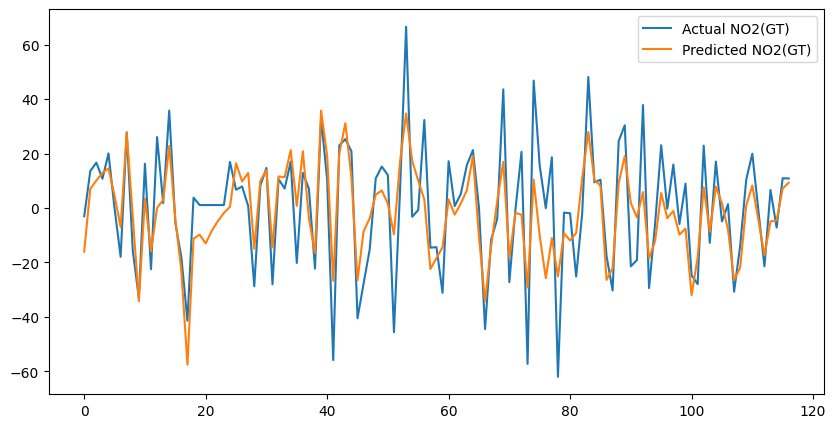

In [334]:
y_pred_gru = model_gru.predict(X_test)

# Compare actual vs predicted
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(ytest_no2, label="Actual NO2(GT)")
plt.plot(y_pred_gru, label="Predicted NO2(GT)")
plt.legend()
plt.show()

In [336]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(ytest_no2, y_pred_gru)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest_no2, y_pred_gru)
r2 = r2_score(ytest_no2, y_pred_gru)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error (MSE): 200.2585
Root Mean Squared Error (RMSE): 14.1513
Mean Absolute Error (MAE): 11.2162
R² Score: 0.6169


### *CO(GT) PREDICTION*

In [338]:
# applying differencing to find seasonality
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_daily['CO(GT)'])
print('ADF value:', result[0])
print('p-value:', result[1])

if result[1] >0.05:
    print('The time series is not stationary. Differencing will be applied')
    df_daily['CO(GT)_diff'] = df_daily['CO(GT)'].diff().dropna()

else:
    print('The series is stationary. Proceeding without differencing')

ADF value: -3.6662672612346277
p-value: 0.004613445938870153
The series is stationary. Proceeding without differencing


In [340]:
fea_co = [col for col in df_daily.columns if col != 'CO(GT)']  # all except target
tar_co = ['CO(GT)']

In [342]:
x_co = df_daily[fea_co].dropna().values
y_co = df_daily[tar_co].dropna().values

In [344]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_co)

In [346]:
xtrain, xtest, ytrain, ytest = train_test_split(x_scaled, y_co, test_size=0.3, random_state=30, shuffle=False)

# Reshape to 3D for LSTM
xtrain = xtrain.reshape((xtrain.shape[0], 1, xtrain.shape[1]))
xtest = xtest.reshape((xtest.shape[0], 1, xtest.shape[1]))

CO(GT)--GRU

In [349]:
model_gru_co = Sequential()
model_gru_co.add(GRU(64, activation='relu', return_sequences=True, input_shape=(xtrain.shape[1], xtrain.shape[2])))
model_gru_co.add(GRU(32, activation='relu', return_sequences=True))
model_gru_co.add(GRU(16, activation='relu'))
model_gru_co.add(Dense(1))  # Predict NO2(GT)

model_gru_co.compile(optimizer='adam', loss='mse')

# Train
history = model_gru_co.fit(xtrain, ytrain, epochs=100, batch_size=32,
                    validation_data=(xtest, ytest), verbose=1)

Epoch 1/100


C:\Users\PC\anaconda3\envs\py312-env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 4.9086 - val_loss: 5.1451
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.6890 - val_loss: 4.8586
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.3069 - val_loss: 4.3408
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.5506 - val_loss: 3.3079
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.0780 - val_loss: 1.4257
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5138 - val_loss: 0.3604
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5605 - val_loss: 0.5113
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3838 - val_loss: 0.6645
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3436 - val_loss: 0.4179
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3234 - val_loss: 0.3719
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3029 - val_loss: 0.4365
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2770 - val_loss: 0.3446
Epoch 13/100

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step


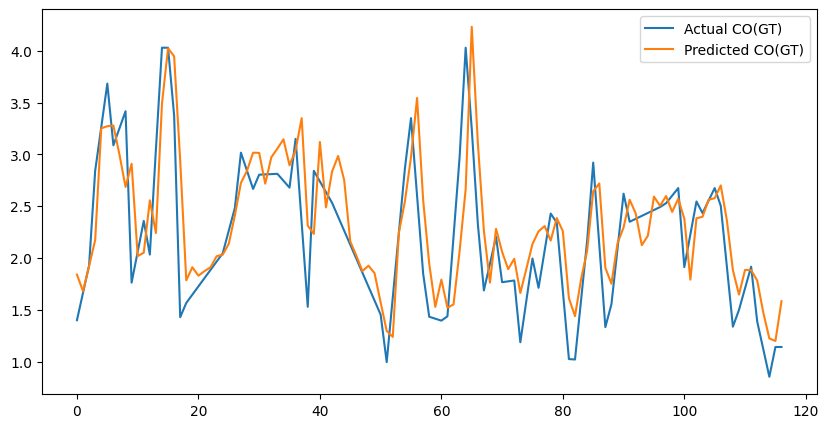

In [350]:
y_pred_co = model_gru_co.predict(xtest)

# Compare actual vs predicted
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(ytest, label="Actual CO(GT)")
plt.plot(y_pred_co, label="Predicted CO(GT)")
plt.legend()
plt.show()

In [355]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(ytest, y_pred_co)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest, y_pred_co)
r2 = r2_score(ytest, y_pred_co)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error (MSE): 0.1909
Root Mean Squared Error (RMSE): 0.4369
Mean Absolute Error (MAE): 0.3244
R² Score: 0.5896


### 5. Model Evaluation
- Use appropriate metrics for forecasting:
  - Mean Absolute Error (MAE)
  - Root Mean Squared Error (RMSE)
  - Mean Absolute Percentage Error (MAPE)
- Plot actual vs. predicted values to visualize performance.


In [358]:
def evaluate_forecast(y_actual, y_pred, model_name="Model"):
    # Metrics
    mae = mean_absolute_error(y_actual, y_pred)
    rmse = np.sqrt(mean_squared_error(y_actual, y_pred))
    mape = np.mean(np.abs((y_actual - y_pred) / y_actual)) * 100  # %

    print(f"Evaluation for {model_name}")
    print(f"MAE  : {mae:.4f}")
    print(f"RMSE : {rmse:.4f}")
    print(f"MAPE : {mape:.2f}%")

    return mae, rmse, mape

In [360]:
evaluate_forecast(ytest, y_pred_co,model_gru_co)

Evaluation for <Sequential name=sequential_4, built=True>
MAE  : 0.3244
RMSE : 0.4369
MAPE : 16.47%


(0.32439668093877877, 0.4368879640882163, 16.468435821715)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


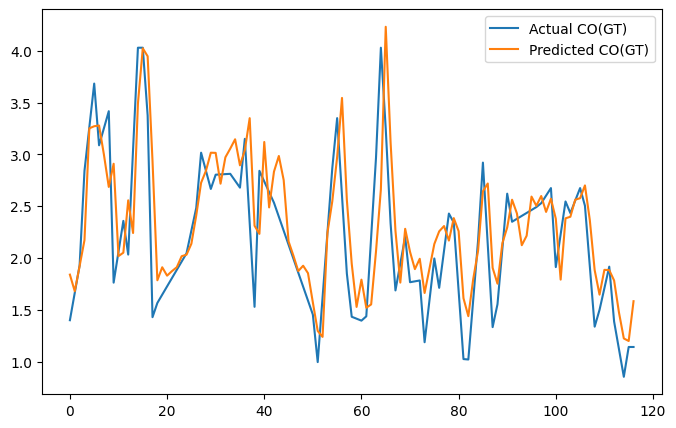

In [366]:
y_pred_co = model_gru_co.predict(xtest)

# Compare actual vs predicted
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(ytest, label="Actual CO(GT)")
plt.plot(y_pred_co, label="Predicted CO(GT)")
plt.legend()
plt.show()

In [364]:
evaluate_forecast(ytest_no2, y_pred_gru, model_gru)

Evaluation for <Sequential name=sequential_3, built=True>
MAE  : 11.2162
RMSE : 14.1513
MAPE : inf%


C:\Users\PC\AppData\Local\Temp\ipykernel_8868\2979779528.py:5: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_actual - y_pred) / y_actual)) * 100  # %


(11.2161920683676, 14.151270339116447, inf)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


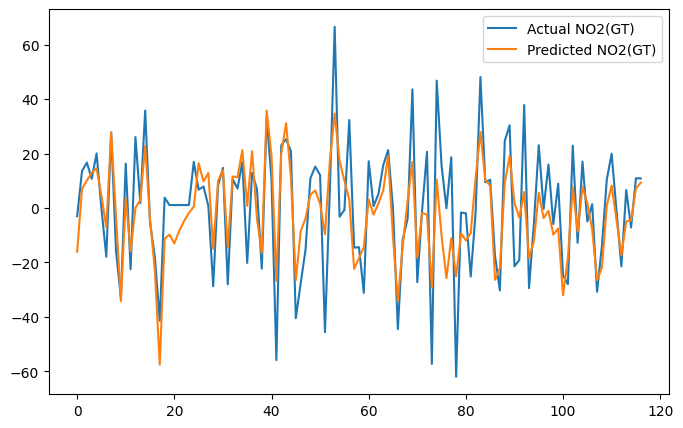

In [368]:
y_pred_gru = model_gru.predict(X_test)

# Compare actual vs predicted
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(ytest_no2, label="Actual NO2(GT)")
plt.plot(y_pred_gru, label="Predicted NO2(GT)")
plt.legend()
plt.show()